In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from spatter import *

/home/gehrin/miniconda3/envs/vlm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gehrin/miniconda3/envs/vlm/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
path = 'videos/pedestrian_area_1080p25.yuv'

In [8]:
my_filter = MySpatter()
my_filter.set_params({})
my_filter.apply_filter_video(input_path=path, output_path='videos/tired.yuv')

done filtering


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/gehrin/miniconda3/envs/vlm --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    5

21.95184

In [9]:
sample_yuv_frames(path, 'videos/shrt.yuv', 1920, 1080, num_frames=30)

Saved 30 frames to videos/shrt.yuv in YUV format


In [11]:
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 8, # объем разведки. Всегда настраивайте!
        n_ei_candidates=15, # влияет на "точность шага"
)
psnrs = [15,17.5, 20, 22.5,  25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5]
for psnr in psnrs:
    study = start_optimization(partial(my_filter.get_objective, input_path='videos/shrt.yuv', output_path='videos/res.yuv', needed_psnr=psnr), n_trials = 150, n_jobs = 1,
                           tpe_sampler = tpe_sampler)
    my_filter.set_params(study.best_trial.params)
    my_filter.apply_filter_video(input_path=path)

[I 2024-11-24 14:25:13,876] A new study created in memory with name: no-name-9eab2cae-fccd-48e9-a23c-a5f69bbc2e8f
[W 2024-11-24 14:25:13,877] Trial 0 failed with parameters: {} because of the following error: TypeError("MySpatter.get_objective() got an unexpected keyword argument 'output_path'").
Traceback (most recent call last):
  File "/home/gehrin/miniconda3/envs/vlm/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
TypeError: MySpatter.get_objective() got an unexpected keyword argument 'output_path'
[W 2024-11-24 14:25:13,878] Trial 0 failed with value None.


TypeError: MySpatter.get_objective() got an unexpected keyword argument 'output_path'

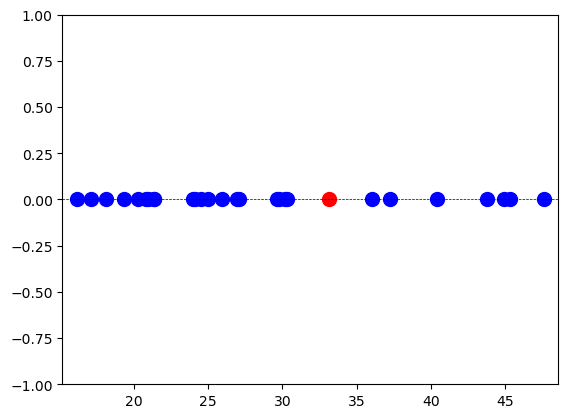

[33.15226999999999]

In [22]:
psnr_analyze('psnr_before.txt')

In [ ]:
psnr_file = 'smth.txt'
my_filter.first_set(psnr_file)
sample_yuv_frames('videos/crowd_run_short_1920x1080_50.yuv', 'videos/shrt.yuv', 1920, 1080, num_frames=30)
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 8, # объем разведки. Всегда настраивайте!
        n_ei_candidates=15, # влияет на "точность шага"
)
added_params = []
for psnr in psnr_analyze(psnr_file):
    study = start_optimization(partial(my_filter.get_objective, input_path='videos/shrt.yuv', needed_psnr=psnr), n_trials = 150, n_jobs = 1,
                           tpe_sampler = tpe_sampler)
    my_filter.set_params(study.best_trial.params)
    psnr = my_filter.apply_filter_video(input_path='videos/crowd_run_short_1920x1080_50.yuv')
    added_params.append([study.best_trial.params, psnr])